<a href="https://colab.research.google.com/github/SebastianBedoya03/Lenguaje_Programaci-n/blob/main/Trabajo_Concurso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Base de Datos**
Se proporcionará un archivo Excel que contiene los precios de cierre mensuales de
aproximadamente 20 acciones que han hecho parte del índice COLCAP, desde enero
de 2010 hasta febrero de 2025. Cada fila representa un mes específico, y cada
columna corresponde a una acción distinta


## **Caso: Análisis Exploratorio de Precios**
El objetivo del caso es calcular y analizar indicadores básicos de los precios de cierre
de varias acciones del COLCAP durante el período proporcionado.


## **Cargar los datos del archivo**
- Leer el archivo Excel o CSV con precios de cierre mensuales.
- Procesar la columna de fechas y ordenar correctamente los datos.

In [1]:
# Librerias del proyecto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo Excel
archivo = pd.read_excel('/content/BD2025_01.xlsx')

In [3]:
# Mostrar las primeras filas
print("Primeras filas del archivo:")
archivo.head()

Primeras filas del archivo:


,Date,PFBCOLO,BCOLO,ECOPETL,ISA,GEB,CEMARGOS,GRUPOARG,PFGRUPSU,PFGRUPOA,...,CORFICOL,GRUPOBOL,PROMIG,BOGOTA,MINEROS,TERPEL,PFCORCOL,CNEC,ETB,COLCAP
0,2010-01-29,21760,22200,2455,12680,1198.0,6495.366,19980,NaN,NaN,...,10950.195,40000,4292.245,31473.509,5500,NaN,11264.812,NaN,1140.0,1363.67
1,2010-02-26,22220,22300,2560,12880,1234.0,6506.432,19300,NaN,NaN,...,12686.790,40000,4172.684,34898.567,5550,NaN,12330.403,NaN,1005.0,1391.02
2,2010-03-31,22280,22280,2700,12800,1250.0,6628.151,19800,NaN,NaN,...,13800.060,42500,4182.249,34528.290,5720,NaN,13540.856,NaN,1040.0,1440.58
3,2010-04-30,23000,23020,2765,12980,1290.0,6373.647,19400,NaN,NaN,...,14906.857,40600,4208.552,36842.519,5720,NaN,14579.233,NaN,1155.0,1467.26
4,2010-05-31,23500,23500,2700,12720,1275.4,6218.732,19200,NaN,NaN,...,14468.126,41420,4184.640,35916.827,5700,NaN,14159.686,NaN,1075.0,1444.54


In [4]:
#Verificacion de los valores nulos por columna
print(archivo.isnull().sum())

Date           0
PFBCOLO        0
BCOLO          0
ECOPETL        0
ISA            0
GEB            0
CEMARGOS       0
GRUPOARG       0
PFGRUPSU      23
PFGRUPOA      29
PEI          151
PFAVAL        16
GRUPOSUR       0
PFDAVVND       9
CELSIA         0
CORFICOL       0
GRUPOBOL       0
PROMIG         0
BOGOTA         0
MINEROS        0
TERPEL        55
PFCORCOL       0
CNEC           6
ETB            0
COLCAP         0
dtype: int64


In [5]:
# Convertir la columna de fechas al tipo datetime
archivo['Date'] = pd.to_datetime(archivo['Date'], dayfirst=True)

In [6]:
# Ordenar los datos por fecha
archivo = archivo.sort_values(by='Date')

In [7]:
# Reiniciar el índice
archivo.reset_index(drop=True, inplace=True)

In [8]:
# Mostrar resumen final
print("\nDatos ordenados por fecha:")
print(archivo.head())


Datos ordenados por fecha:
        Date  PFBCOLO   BCOLO   ECOPETL    ISA     GEB   CEMARGOS   GRUPOARG   \
0 2010-01-29     21760   22200      2455  12680  1198.0   6495.366      19980   
1 2010-02-26     22220   22300      2560  12880  1234.0   6506.432      19300   
2 2010-03-31     22280   22280      2700  12800  1250.0   6628.151      19800   
3 2010-04-30     23000   23020      2765  12980  1290.0   6373.647      19400   
4 2010-05-31     23500   23500      2700  12720  1275.4   6218.732      19200   

   PFGRUPSU   PFGRUPOA   ...  CORFICOL   GRUPOBOL    PROMIG     BOGOTA   \
0        NaN        NaN  ...  10950.195      40000  4292.245  31473.509   
1        NaN        NaN  ...  12686.790      40000  4172.684  34898.567   
2        NaN        NaN  ...  13800.060      42500  4182.249  34528.290   
3        NaN        NaN  ...  14906.857      40600  4208.552  36842.519   
4        NaN        NaN  ...  14468.126      41420  4184.640  35916.827   

   MINEROS   TERPEL   PFCORCOL   C

## **Calcular Rentabilidades Mensuales**
- Para cada acción, calcular la rentabilidad mensual
- Crear una nueva tabla que contenga las rentabilidades mensuales de todas
las acciones.


In [9]:
# rentabilidad mensual para cada acción
rentabilidad = archivo.copy()
rentabilidad.set_index('Date', inplace=True)
rentabilidad = rentabilidad.pct_change()
# Tabla nueva con rentabilidades mensuales de todas las acciones
rentabilidad.head()

,PFBCOLO,BCOLO,ECOPETL,ISA,GEB,CEMARGOS,GRUPOARG,PFGRUPSU,PFGRUPOA,PEI,...,CORFICOL,GRUPOBOL,PROMIG,BOGOTA,MINEROS,TERPEL,PFCORCOL,CNEC,ETB,COLCAP
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-26,0.021140,0.004505,0.042770,0.015773,0.030050,0.001704,-0.034034,NaN,NaN,NaN,...,0.158590,0.000000,-0.027855,0.108824,0.009091,NaN,0.094595,NaN,-0.118421,0.020056
2010-03-31,0.002700,-0.000897,0.054688,-0.006211,0.012966,0.018707,0.025907,NaN,NaN,NaN,...,0.087750,0.062500,0.002292,-0.010610,0.030631,NaN,0.098168,NaN,0.034826,0.035629
2010-04-30,0.032316,0.033214,0.024074,0.014063,0.032000,-0.038397,-0.020202,NaN,NaN,NaN,...,0.080202,-0.044706,0.006289,0.067024,0.000000,NaN,0.076685,NaN,0.110577,0.018520
2010-05-31,0.021739,0.020851,-0.023508,-0.020031,-0.011318,-0.024306,-0.010309,NaN,NaN,NaN,...,-0.029431,0.020197,-0.005682,-0.025126,-0.003497,NaN,-0.028777,NaN,-0.069264,-0.015485


## **Cálculos agregados sobre rentabilidades**
Para cada acción:
- Calcular la rentabilidad promedio mensual entre enero de 2010 y febrero
de 2025.
- Calcular la rentabilidad mínima y rentabilidad máxima observadas en
cualquier mes.
- Calcular la rentabilidad acumulada total entre enero de 2010 y febrero de
2025


In [10]:
# Cálculos agregados
rentabilidad_prom = rentabilidad.mean()
rentabilidad_min = rentabilidad.min()
rentabilidad_max = rentabilidad.max()
rentabilidad_acum = (1 + rentabilidad).prod() - 1

In [11]:
# Dataframe de los Calculos agregados
calculos_agregados = pd.DataFrame({
    'Rentabilidad Promedio Mensual': rentabilidad_prom,
    'Rentabilidad Mínima Mensual': rentabilidad_min,
    'Rentabilidad Máxima Mensual': rentabilidad_max,
    'Rentabilidad Acumulada Total': rentabilidad_acum
})

In [12]:
# Mostrar el Dataframe
print("\nIndicadores de rentabilidad por acción:")
print(calculos_agregados.round(4))  # Redondeado a 4 decimales


Indicadores de rentabilidad por acción:
           Rentabilidad Promedio Mensual  Rentabilidad Mínima Mensual  \
PFBCOLO                           0.0062                      -0.3465   
BCOLO                             0.0069                      -0.3821   
ECOPETL                           0.0031                      -0.3881   
ISA                               0.0050                      -0.1846   
GEB                               0.0065                      -0.1744   
CEMARGOS                          0.0065                      -0.2283   
GRUPOARG                          0.0029                      -0.2516   
PFGRUPSU                          0.0051                      -0.3644   
PFGRUPOA                          0.0028                      -0.2464   
PEI                               0.0171                      -0.2312   
PFAVAL                           -0.0015                      -0.3814   
GRUPOSUR                          0.0060                      -0.3436   
PFDAVVND  

## **Análisis exploratorio**
Responder las siguientes preguntas basadas en las rentabilidades:


¿Cuál acción tuvo la mayor rentabilidad promedio mensual?

In [13]:
# Acción con mayor rentabilidad promedio mensual
accion_mayor_rentprom = calculos_agregados['Rentabilidad Promedio Mensual'].idxmax()
mayor_rentabilidad_promedio = calculos_agregados['Rentabilidad Promedio Mensual'].max()

In [14]:
print("La acción que obtuvo la mayor rentabilidad promedio mensual fue:")
print(f"{accion_mayor_rentprom} con {mayor_rentabilidad_promedio:.4f}\n")

La acción que obtuvo la mayor rentabilidad promedio mensual fue:
PEI  con 0.0171



¿Cuál acción tuvo el mayor valor de rentabilidad mensual positiva en algún
mes?

In [15]:
# Acción con el mayor valor de rentabilidad mensual positiva en algún mes
mayor_rentabilidad_mensual = rentabilidad.max().max()
accion_mayor_rentabilidad_mensual = rentabilidad.max().idxmax()

In [16]:
print("La acción que obtuvo el mayor valor de rentabilidad mensual positiva fue:")
print(f"   {accion_mayor_rentabilidad_mensual} con {mayor_rentabilidad_mensual:.4f}\n")

La acción que obtuvo el mayor valor de rentabilidad mensual positiva fue:
   CEMARGOS  con 0.6919



¿Cuál acción tuvo la mayor rentabilidad acumulada total en el periodo?


In [17]:
# Acción con mayor rentabilidad acumulada total en el periodo
accion_mayor_rentabilidad_acumulada = calculos_agregados['Rentabilidad Acumulada Total'].idxmax()
valor_mayor_rentabilidad_acumulada = calculos_agregados['Rentabilidad Acumulada Total'].max()

In [18]:
print("La acción que obtuvo la mayor rentabilidad acumulada total en el periodo fue:")
print(f"   {accion_mayor_rentabilidad_acumulada} con {valor_mayor_rentabilidad_acumulada:.2f}\n")

La acción que obtuvo la mayor rentabilidad acumulada total en el periodo fue:
   GEB  con 1.40



Para cada acción, ¿en cuántos meses tuvo una rentabilidad negativa?


In [19]:
# Cantidad de meses con rentabilidad negativa por acción
meses_negativos = (rentabilidad < 0).sum()

In [20]:
print("Cantidad de meses con rentabilidad negativa por acción:")
print(meses_negativos, '\n')

Cantidad de meses con rentabilidad negativa por acción:
PFBCOLO       78
BCOLO         83
ECOPETL       83
ISA           85
GEB           83
CEMARGOS      85
GRUPOARG      83
PFGRUPSU      74
PFGRUPOA      72
PEI           15
PFAVAL        82
GRUPOSUR      89
PFDAVVND      80
CELSIA        91
CORFICOL      78
GRUPOBOL      87
PROMIG        80
BOGOTA        94
MINEROS       94
TERPEL        63
PFCORCOL      85
CNEC          94
ETB          105
COLCAP        86
dtype: int64 



¿Cuál acción fue la más volátil (mayor desviación estándar de la rentabilidad
mensual)?

In [22]:
# Acción más volátil (mayor desviación estándar de la rentabilidad mensual)
volatilidad = rentabilidad.std()
accion_mas_volatil = volatilidad.idxmax()
valor_mas_volatil = volatilidad.max()

In [23]:
print("La acción más volátil (mayor desviación estándar mensual) fue:")
print(f"   {accion_mas_volatil} con {valor_mas_volatil:.4f}\n")

La acción más volátil (mayor desviación estándar mensual) fue:
   PEI  con 0.1297



¿Qué acciones tuvieron más de 70% de meses con rentabilidad positiva?

In [24]:
# 6. Acciones con más de 70% de meses con rentabilidad positiva
meses_totales = rentabilidad.count()
meses_positivos = (rentabilidad > 0).sum()
porcentaje_positivos = (meses_positivos / meses_totales) * 100
acciones_mayores_70 = porcentaje_positivos[porcentaje_positivos > 70]

In [25]:
print("Las acciones con más de 70% de meses con rentabilidad positiva:")
print(acciones_mayores_70)

Las acciones con más de 70% de meses con rentabilidad positiva:
Series([], dtype: float64)


## **Visualización de Resultados**

In [26]:
# Lista de los nombres de acciones disponibles
print(rentabilidad.columns.tolist())

['PFBCOLO ', 'BCOLO ', 'ECOPETL ', 'ISA ', 'GEB ', 'CEMARGOS ', 'GRUPOARG ', 'PFGRUPSU ', 'PFGRUPOA ', 'PEI ', 'PFAVAL ', 'GRUPOSUR ', 'PFDAVVND ', 'CELSIA ', 'CORFICOL ', 'GRUPOBOL ', 'PROMIG ', 'BOGOTA ', 'MINEROS ', 'TERPEL ', 'PFCORCOL ', 'CNEC ', 'ETB ', 'COLCAP']


## **Gráficos de líneas**
- Evolución de la rentabilidad mensual de 3 acciones seleccionadas.

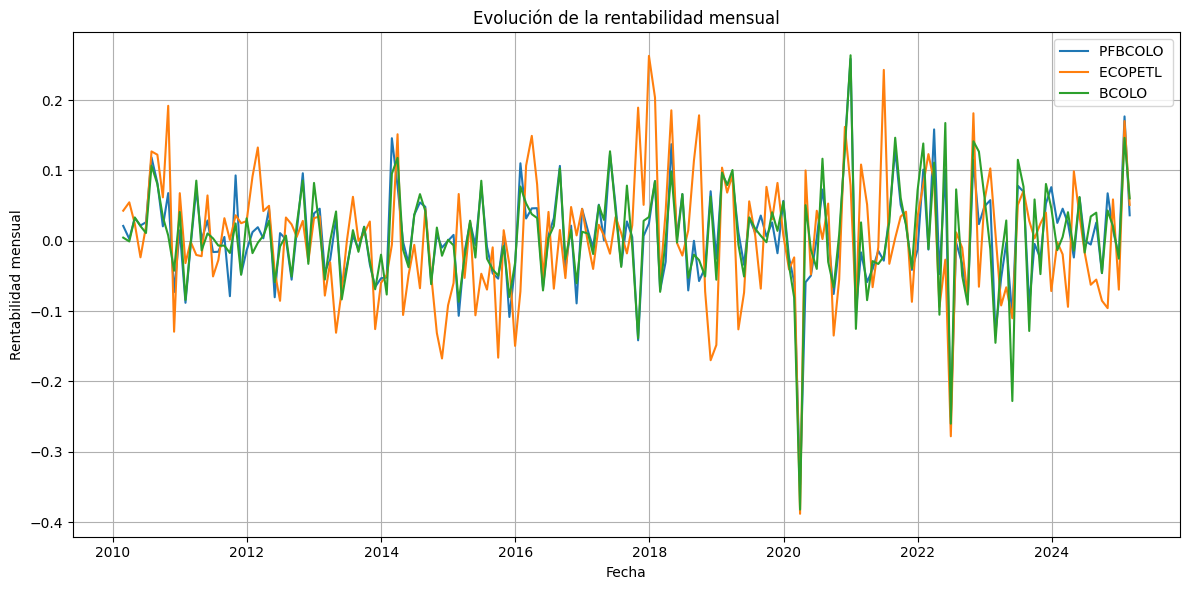

In [27]:
# 3 acciones para analizar
acciones_seleccionadas = ['PFBCOLO ', 'ECOPETL ', 'BCOLO ']  # Cambia los nombres si deseas otras

# Filtrar la tabla de rentabilidades para las acciones
rentabilidad_sel = rentabilidad[acciones_seleccionadas]

# gráfico de líneas
plt.figure(figsize=(12, 6))
for accion in acciones_seleccionadas:
    plt.plot(rentabilidad_sel.index, rentabilidad_sel[accion], label=accion)

# Personalización del gráfico
plt.title('Evolución de la rentabilidad mensual')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad mensual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Gráficos de barras**
- Comparación de rentabilidad acumulada total entre todas las acciones.

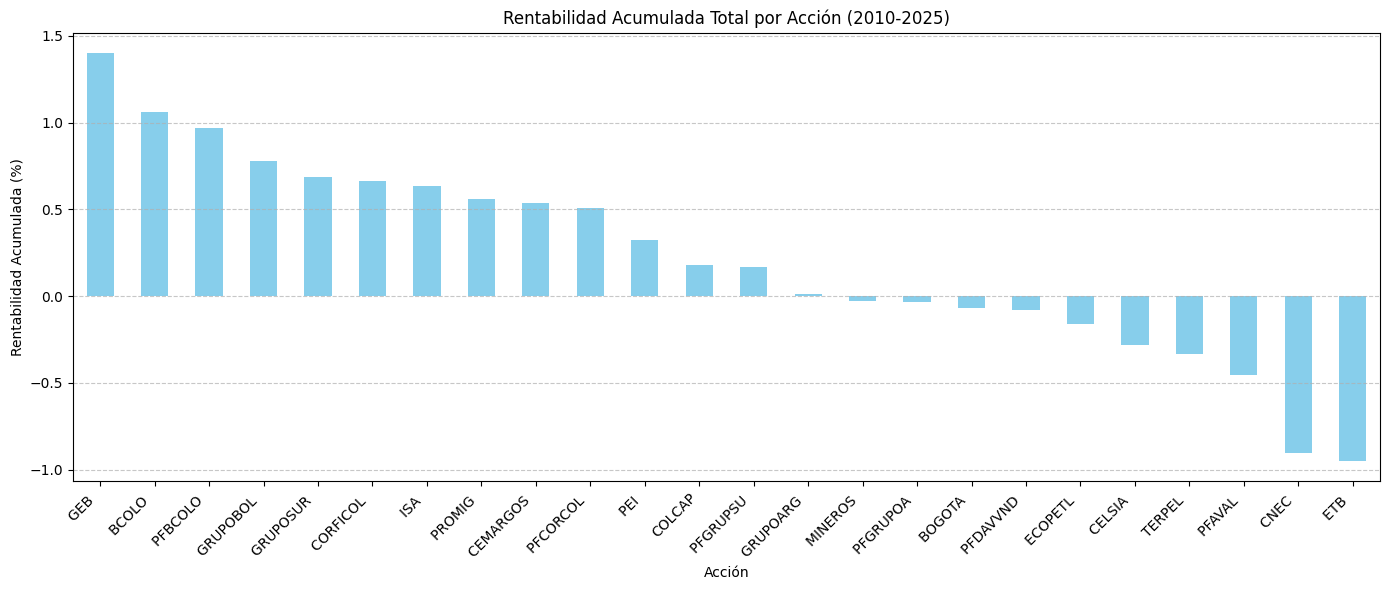

In [28]:
# Orden  de las rentabilidades de mayor a menor
rentabilidad_ordenada = rentabilidad_acum.sort_values(ascending=False)

# gráfico de barras
plt.figure(figsize=(14, 6))
rentabilidad_ordenada.plot(kind='bar', color='skyblue')

# Personalización del gráfico
plt.title('Rentabilidad Acumulada Total por Acción (2010-2025)')
plt.xlabel('Acción')
plt.ylabel('Rentabilidad Acumulada (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Gráficos de caja (boxplots)**
- Distribución de rentabilidades mensuales por acción.

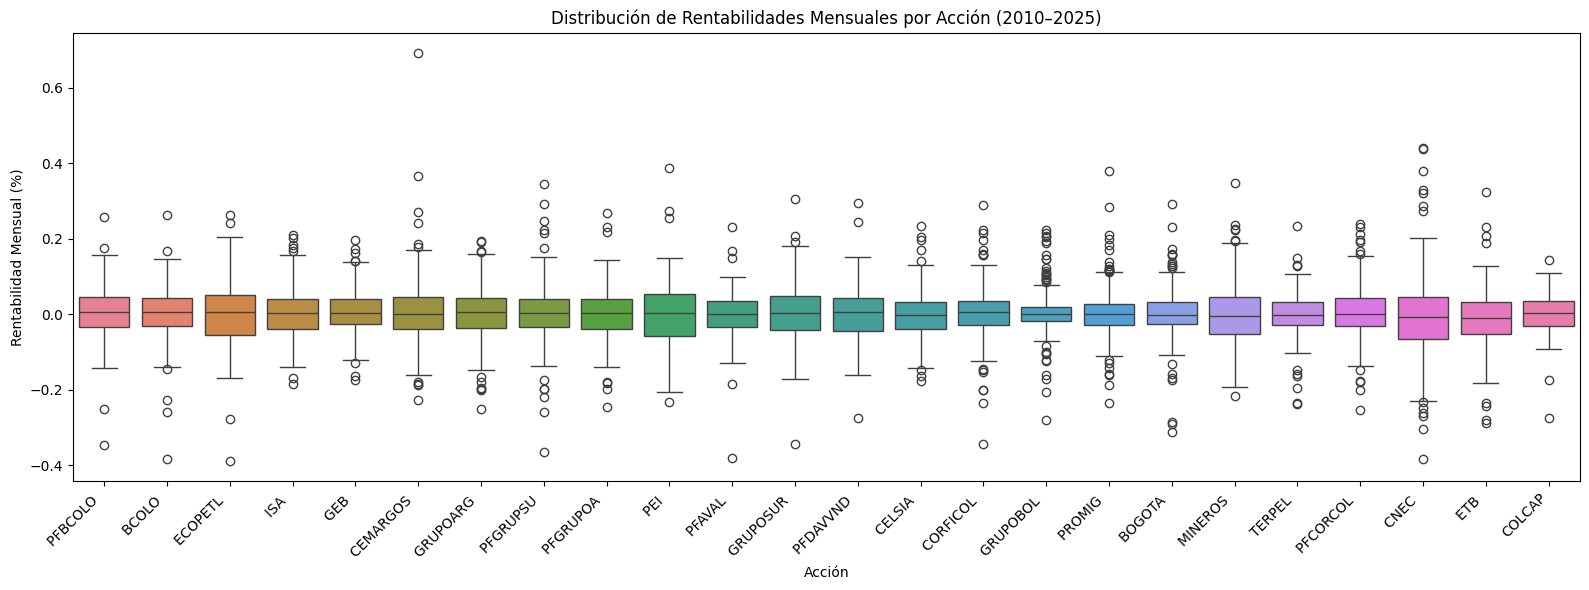

In [29]:
# tamaño del gráfico
plt.figure(figsize=(16, 6))

# boxplot con Seaborn
sns.boxplot(data=rentabilidad)

# Personalización del gráfico
plt.title('Distribución de Rentabilidades Mensuales por Acción (2010–2025)')
plt.xlabel('Acción')
plt.ylabel('Rentabilidad Mensual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Histograma**
- Distribución de todas las rentabilidades mensuales juntas (para ver
asimetría o dispersión).

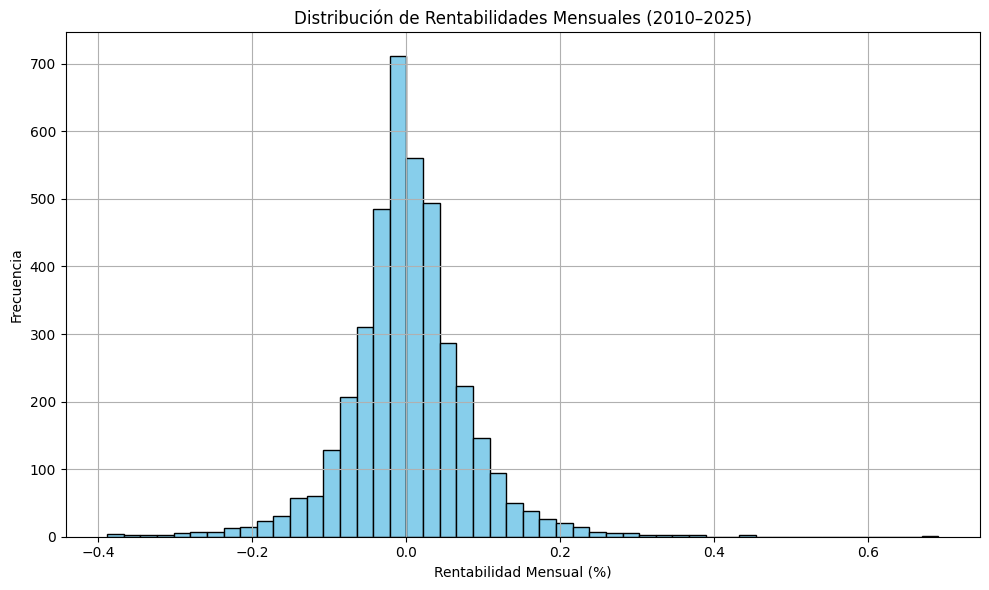

In [30]:
# Combinar todas las rentabilidades en una sola serie
todas_rentabilidades = rentabilidad.values.flatten()
todas_rentabilidades = todas_rentabilidades[~pd.isnull(todas_rentabilidades)]  # Eliminar NaN

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(todas_rentabilidades, bins=50, color='skyblue', edgecolor='black')

# Títulos y etiquetas
plt.title('Distribución de Rentabilidades Mensuales (2010–2025)')
plt.xlabel('Rentabilidad Mensual (%)')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## **Gráfica de Barras**
- Visualización de los meses con rentabilidad positiva por año para una acción específica

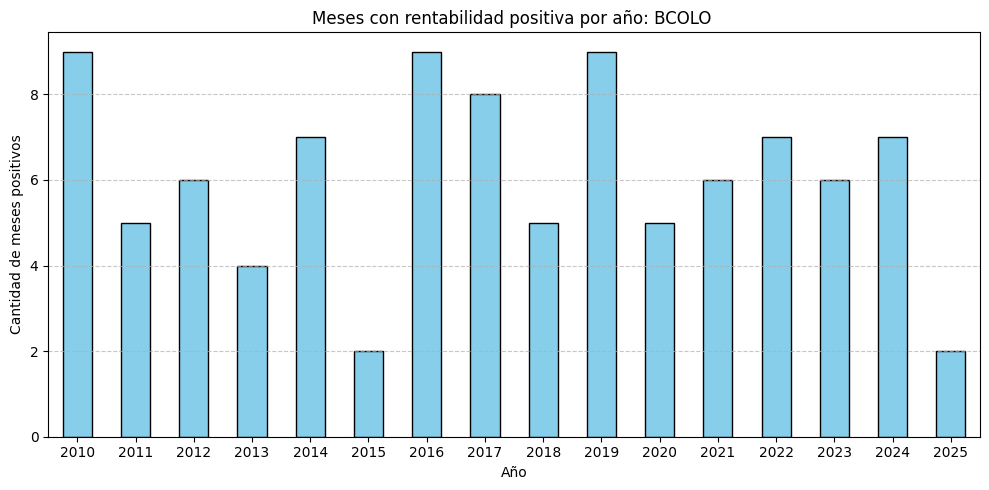

In [31]:
# Acción que quieres analizar
accion_objetivo = 'BCOLO '  # Puedes alternar entre acciones para visualizar el comportamiento

# Copia del DataFrame de rentabilidades
rentabilidad_anual = rentabilidad.copy()
rentabilidad_anual['Año'] = rentabilidad_anual.index.year

# Filtrar la acción objetivo y contar cuántos meses tiene rentabilidad positiva por año
meses_positivos_anuales = rentabilidad_anual.groupby('Año')[accion_objetivo].apply(lambda x: (x > 0).sum())

# Gráfica de barras
plt.figure(figsize=(10, 5))
meses_positivos_anuales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Meses con rentabilidad positiva por año: {accion_objetivo}')
plt.xlabel('Año')
plt.ylabel('Cantidad de meses positivos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **Gráfica de Lineas**
- Visualización de la evolución del precio promedio de la acción a lo largo de los años.

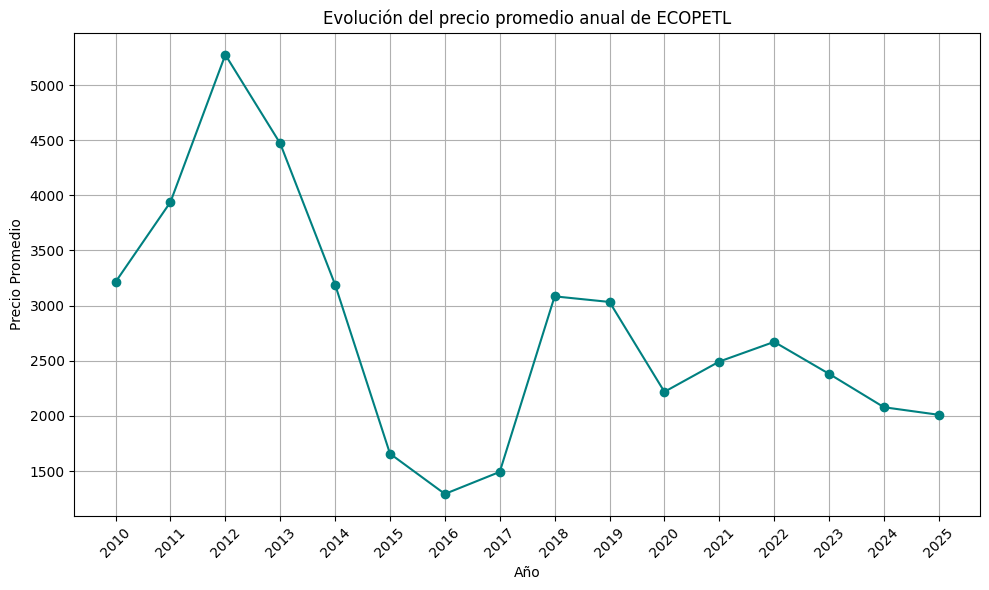

In [32]:
# Acción que quieres analizar
accion = 'ECOPETL '

# Crear columna de año
archivo['Año'] = archivo['Date'].dt.year

# Agrupar por año y obtener el precio promedio mensual
precios_por_anio = archivo.groupby('Año')[accion].mean()

# Grafica de lineas
plt.figure(figsize=(10, 6))
precios_por_anio.plot(marker='o', linestyle='-', color='teal')
plt.title(f'Evolución del precio promedio anual de {accion.strip()}')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.xticks(precios_por_anio.index, rotation=45)
plt.tight_layout()
plt.show()
